In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sewar import full_ref
from skimage import measure, metrics
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import pprint

**Assessment 1**

In [3]:
img_blurry = cv.imread('blurry.jpg',0)
img_dark = cv.imread('dark.jpg',0)
img_clear = cv.imread('clear.jpg',0)

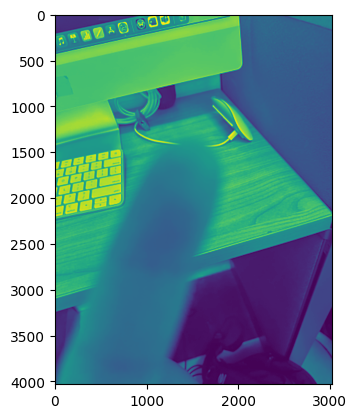

In [24]:
plt.imshow(img_blurry)


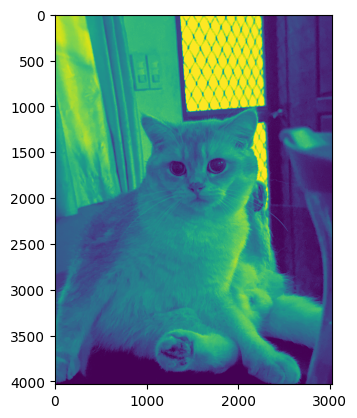

In [8]:
plt.imshow(img_clear)

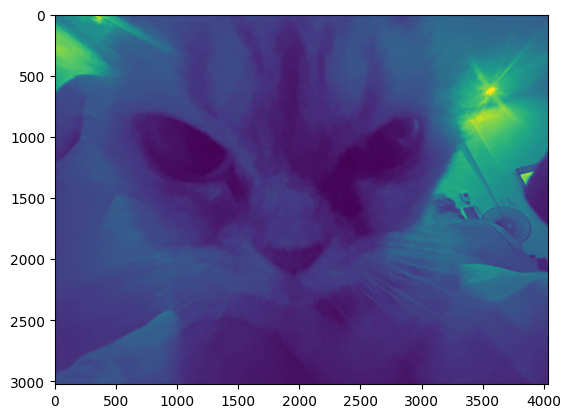

In [9]:
plt.imshow(img_dark)

In [14]:
def convolution(image):
    mean_kernel = np.ones((3,3), np.float32)/25
    conv_mean = cv.filter2D(image, -1, mean_kernel, borderType = cv.BORDER_CONSTANT)
    return conv_mean

In [ ]:
def evaluate(image_type, convolution):
    rmse_skimg = metrics.normalized_root_mse(image_type, convolution)
    mse_skimg = metrics.mean_squared_error(image_type, convolution)
    psnr_skimg = metrics.peak_signal_noise_ratio(image_type, convolution)
    ssim_skimg = ssim(image_type, convolution, data_range = image_type.max() - image_type.min(), multichannel = True)
    return {
        'RMSE: ' : rmse_skimg,
        'MSE: ' : mse_skimg,
        'PSNR: ' : psnr_skimg,
        'SSIM: ' : ssim_skimg
    }

In [18]:
clear_conv_mean = convolution(img_clear)
pprint.pp(evaluate(img_clear, clear_conv_mean))


{'RMSE: ': 0.6401539517507269,
 'MSE: ': 6950.728757243638,
 'PSNR: ': 9.710500197803398,
 'SSIM: ': 0.5648740494976102}


In [21]:
dark_conv_mean = convolution(img_dark)
pprint.pp(evaluate(img_dark, dark_conv_mean))

{'RMSE: ': 0.6402422035579165,
 'MSE: ': 1858.0318259151654,
 'PSNR: ': 15.44027212189318,
 'SSIM: ': 0.6355758783740962}


In [22]:
blurry_conv_mean = convolution(img_blurry)
pprint.pp(evaluate(img_blurry, blurry_conv_mean))

{'RMSE: ': 0.6401732106568394,
 'MSE: ': 6221.124014907854,
 'PSNR: ': 10.192115020017997,
 'SSIM: ': 0.6245623583880364}
